In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("All Predictions.csv")

In [13]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

In [14]:
gdf = gdf[["constituency", "geometry"]]

In [15]:
df = pd.merge(gdf, df, left_on="constituency", right_on="Constituency")

In [51]:
def show_region(region:str, pred="mean"):
    party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}
    rdf = df[df["region"] == region]
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))

    rdf.plot(ax=ax1, figsize=(20,20), color="none", edgecolor="none")
    rdf.plot(ax=ax2, figsize=(20,20), color="none", edgecolor="none")

    
    for party in (rdf["2019_winner"].unique()):
        rdf[rdf["2019_winner"] == party].plot(ax=ax1, color=party_colours[party], edgecolor="none")

    for party in (rdf[f"{pred}_Winner"].unique()):
        rdf[rdf[f"{pred}_Winner"] == party].plot(ax=ax2, color=party_colours[party], edgecolor="none")

    

    plt.show()

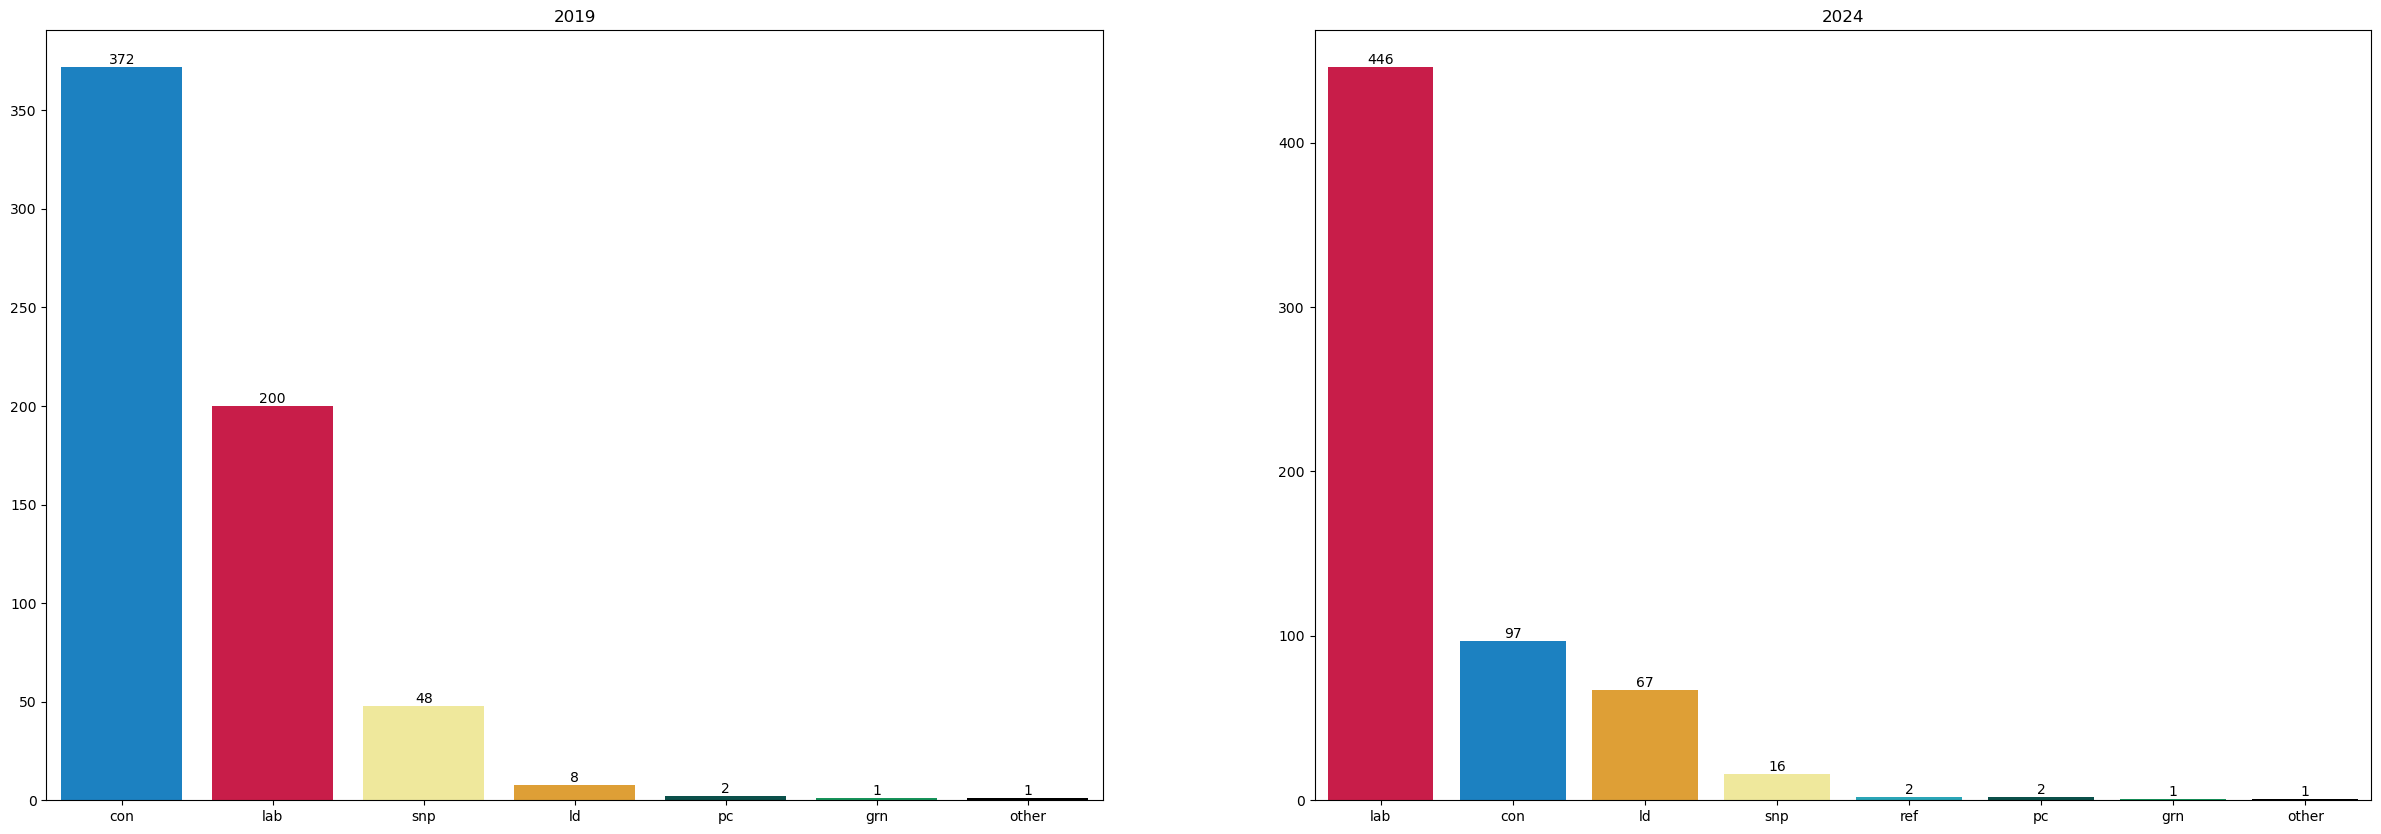

In [82]:
party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["mean_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
sns.barplot(ax=ax2, y=df["mean_Winner"].value_counts().values, x=list(df["mean_Winner"].value_counts().index), hue=df["mean_Winner"].value_counts().index, palette=ordered_colours, legend=False)
sns.barplot(ax=ax1, y=df["2019_winner"].value_counts().values, x=list(df["2019_winner"].value_counts().index), hue=df["2019_winner"].value_counts().index, palette=ordered_colours, legend=False)
ax1.set_title("2019")
ax2.set_title("2024")

for i in ax1.containers:
    ax1.bar_label(i,)

for i in ax2.containers:
    ax2.bar_label(i,)

plt.show()

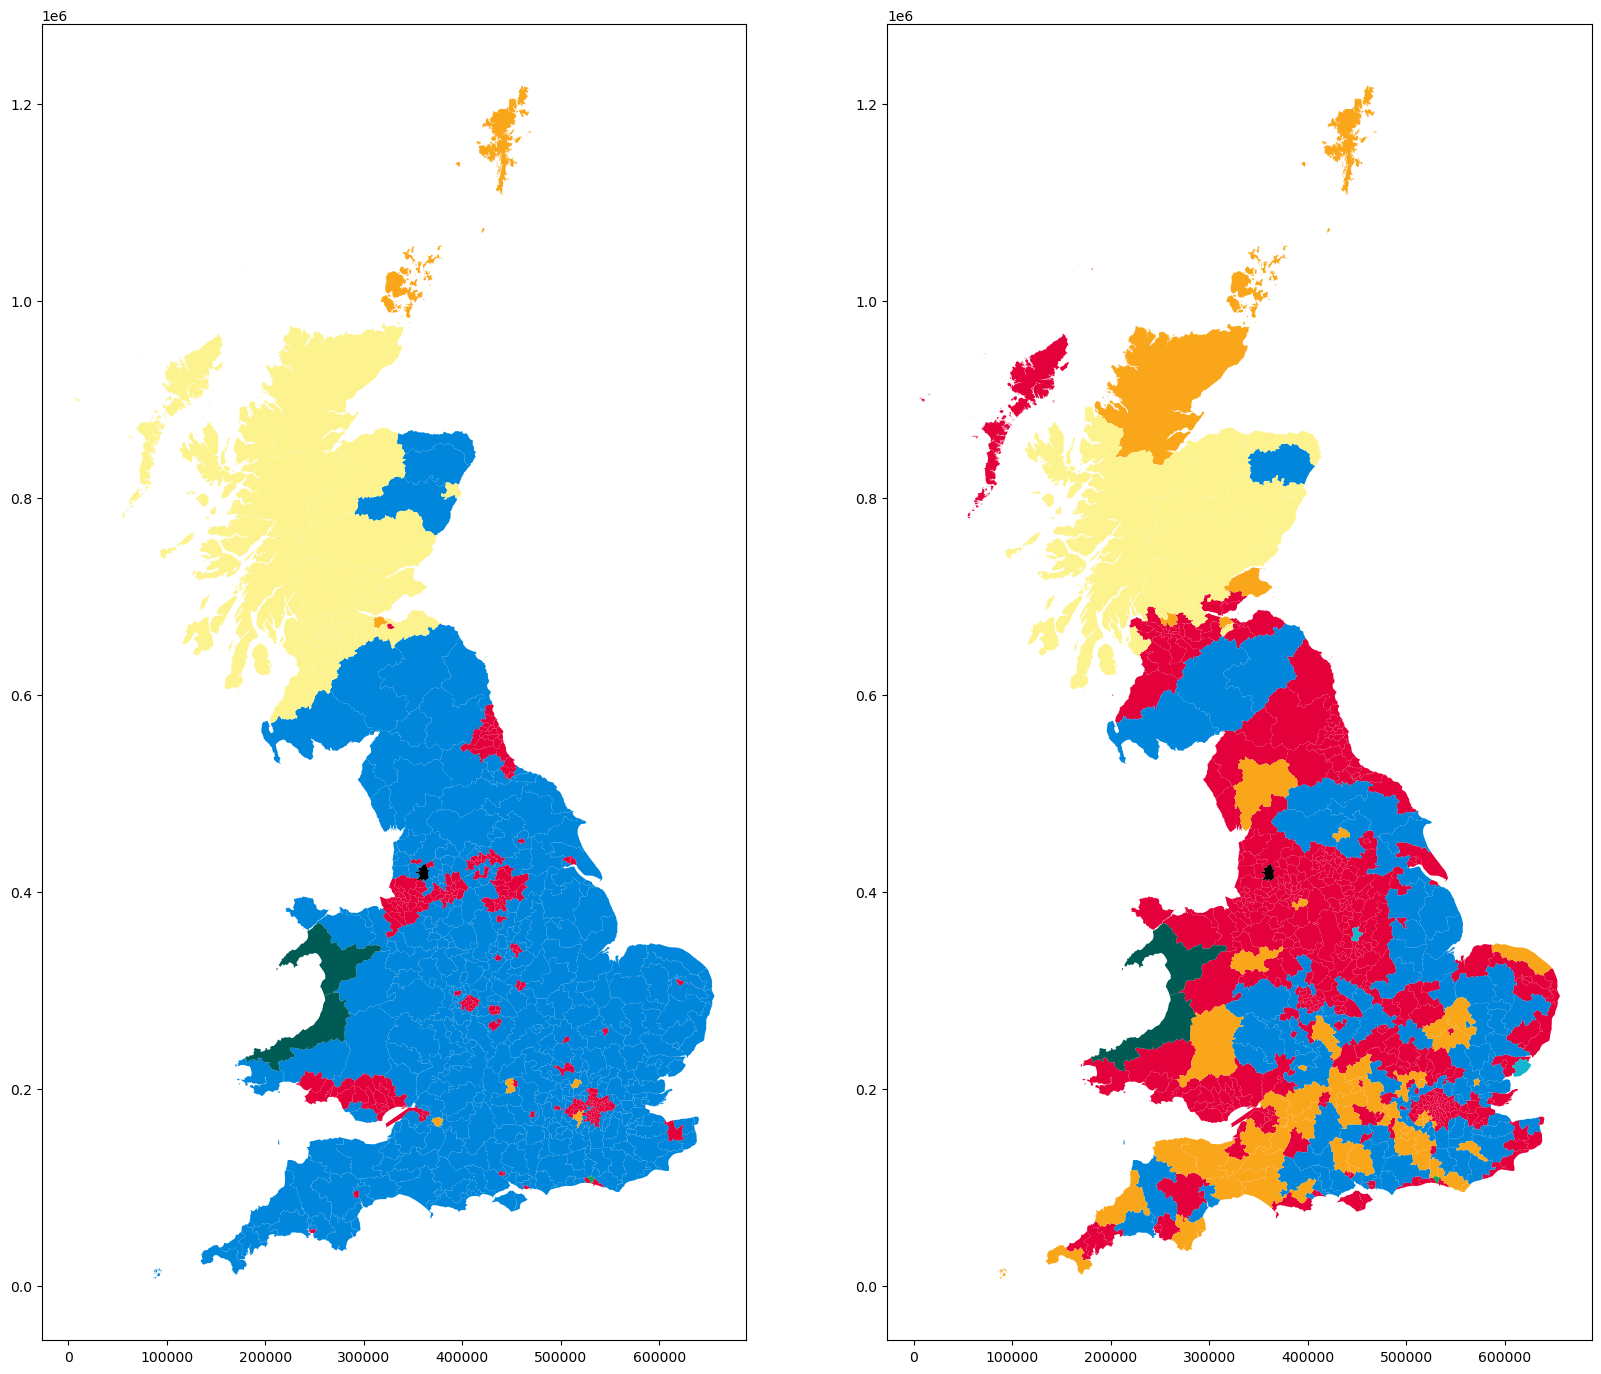

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

df.plot(ax = ax1, color="none", edgecolor="none")

for party in df["2019_winner"].unique():
    df[df["2019_winner"] == party].plot(ax=ax1, color= party_colours[party])

df.plot(ax = ax2, color="none", edgecolor="none")

for party in df["mean_Winner"].unique():
    df[df["mean_Winner"] == party].plot(ax=ax2, color= party_colours[party])

plt.show()

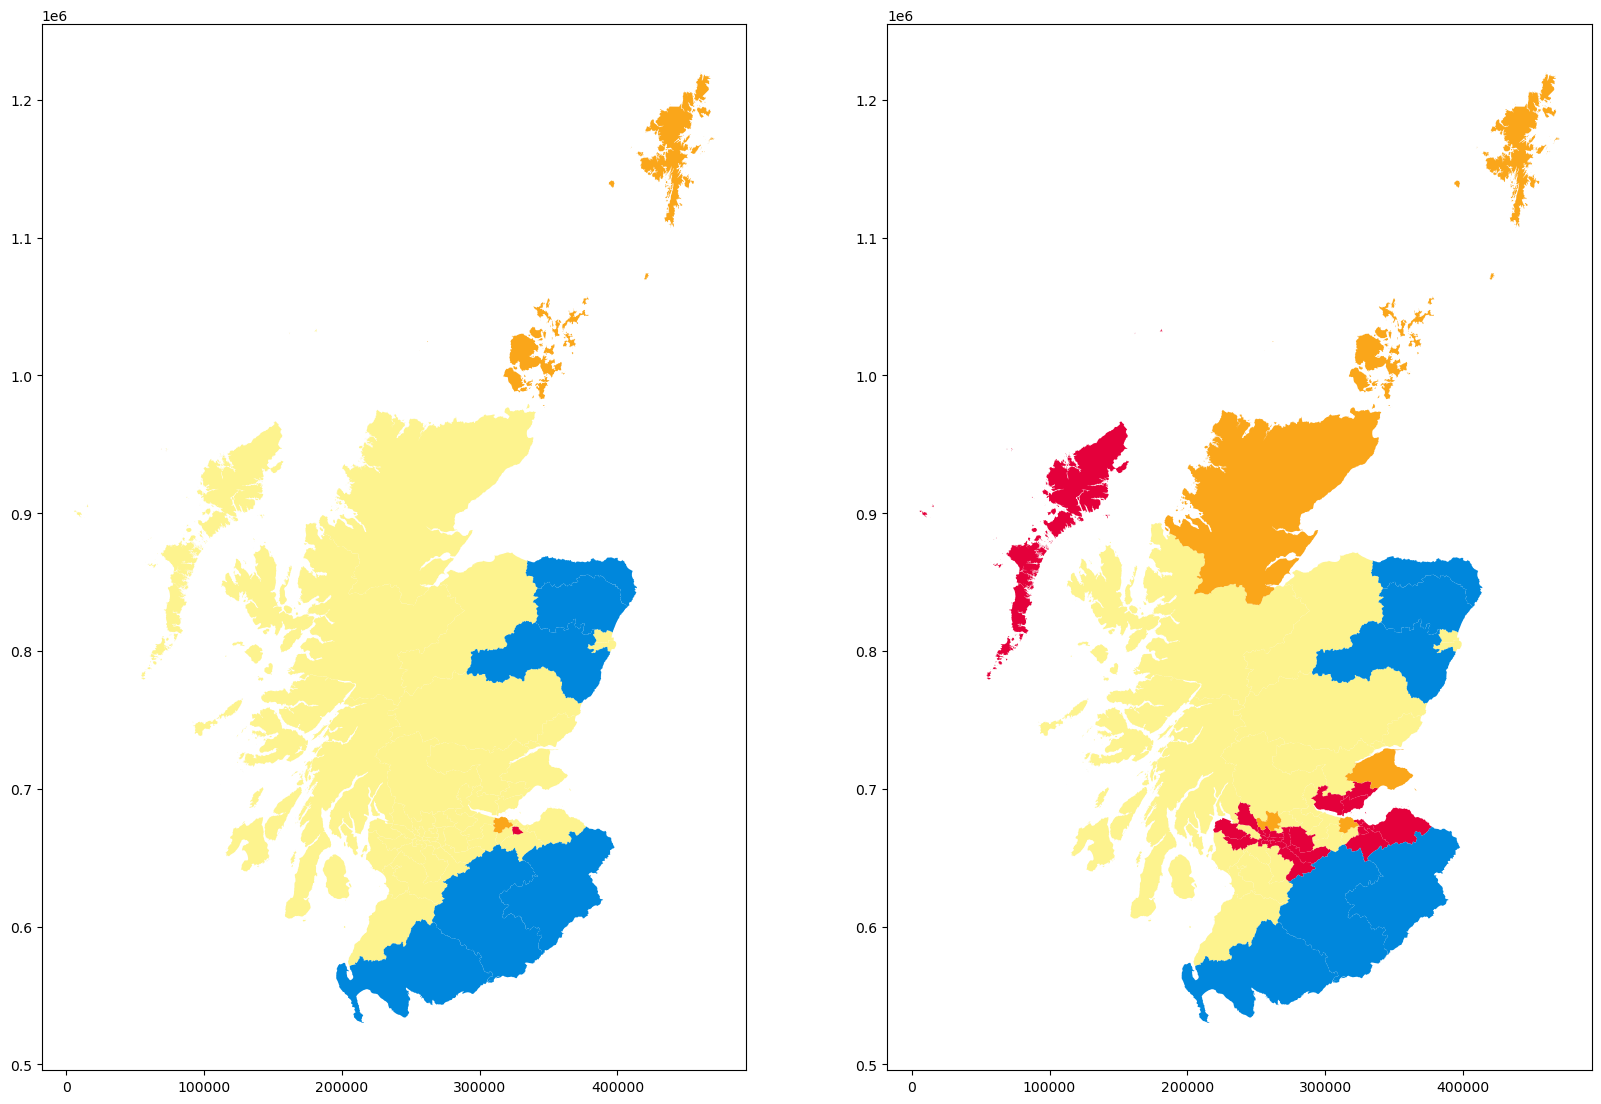

In [67]:
show_region("SC", "BP")

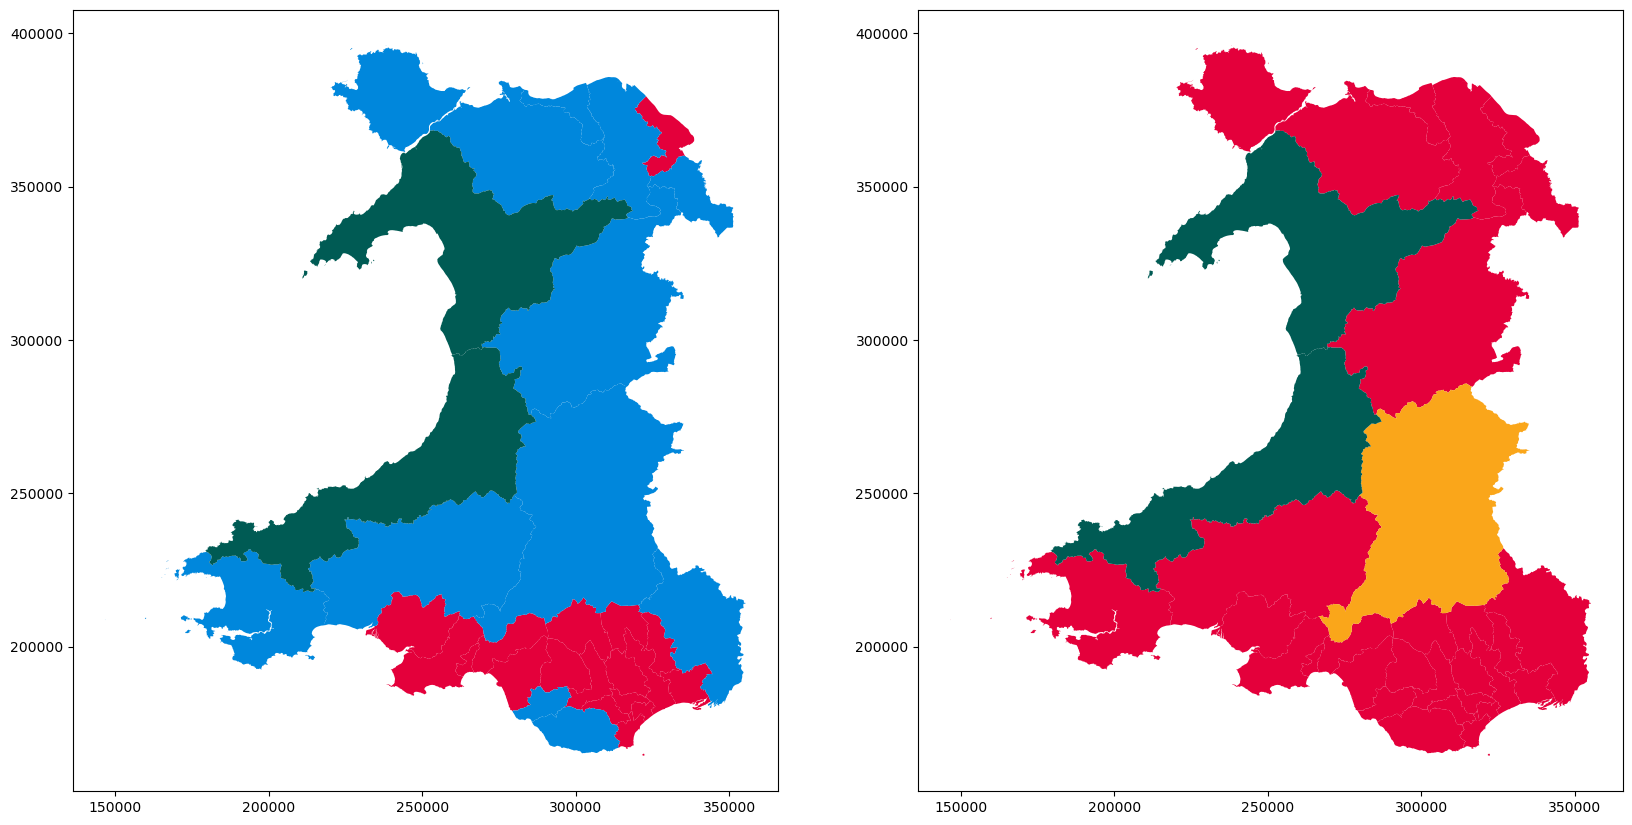

In [68]:
show_region("WA")

In [69]:
df["country"]

0      England
1      England
2      England
3      England
4      England
        ...   
627      Wales
628      Wales
629      Wales
630      Wales
631      Wales
Name: country, Length: 632, dtype: object